# Import Data and Preprocessing

In [108]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
#Reading the files
features = pd.read_csv('bank_transactions_dataset/bank_transaction_features.csv')
labels = pd.read_csv('bank_transactions_dataset/bank_transaction_labels.csv')

In [110]:
#printing out first few rows
features.head()

,bank_transaction_id,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,citylink,-13.80,MPO
1,21786196,citylink,-13.14,DEB
2,21786197,1Jul19 OYSTER,-36.98,DEB
3,21786198,travelodge,-75.73,MPO
4,21786199,6Jul19 RINGGO,-37.86,CSH


In [111]:
#dimensions of features
features.shape

(12500, 4)

In [112]:
#first few rows of labels dataframe
labels.head()

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset
0,21786195,TRAVEL,TRAIN
1,21786196,TRAVEL,TRAIN
2,21786197,TRAVEL,TRAIN
3,21786198,TRAVEL,TRAIN
4,21786199,TRAVEL,TRAIN


In [113]:
#shape of labels
labels.shape

(12500, 3)

In [114]:
#Left join to merge both the data sets for a final dataframe
final_df_original = features.merge(labels, how = 'left')

#Droping bank_transaction_id column as it will not add any value to our model
final_df_original.drop('bank_transaction_id',1, inplace = True)

In [115]:
#first few rows of final dataframe
final_df_original.head()

,bank_transaction_description,bank_transaction_amount,bank_transaction_type,bank_transaction_category,bank_transaction_dataset
0,citylink,-13.80,MPO,TRAVEL,TRAIN
1,citylink,-13.14,DEB,TRAVEL,TRAIN
2,1Jul19 OYSTER,-36.98,DEB,TRAVEL,TRAIN
3,travelodge,-75.73,MPO,TRAVEL,TRAIN
4,6Jul19 RINGGO,-37.86,CSH,TRAVEL,TRAIN


In [116]:
#making a copy of original dataframe
final_df = final_df_original.copy()

# Exploratory Data Analysis

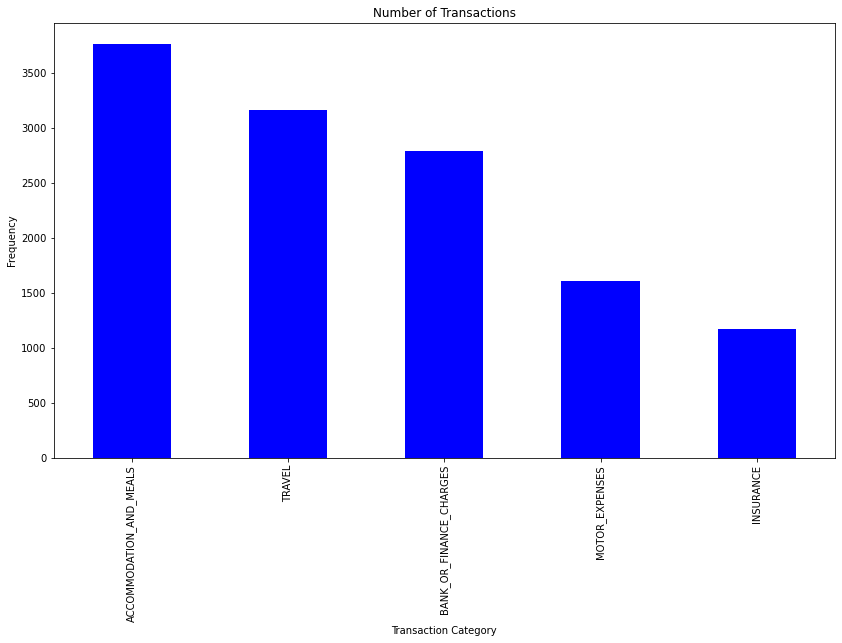

In [117]:
#Number of transactions by category
ax = final_df['bank_transaction_category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Transactions", color ='blue')
ax.set_xlabel("Transaction Category")
ax.set_ylabel("Frequency")
plt.show()

In [167]:
#transactions by category name
final_df['bank_transaction_category'].value_counts()

ACCOMMODATION_AND_MEALS    3765
TRAVEL                     3166
BANK_OR_FINANCE_CHARGES    2790
MOTOR_EXPENSES             1609
INSURANCE                  1170
Name: bank_transaction_category, dtype: int64

All category types have enough data points in each category.

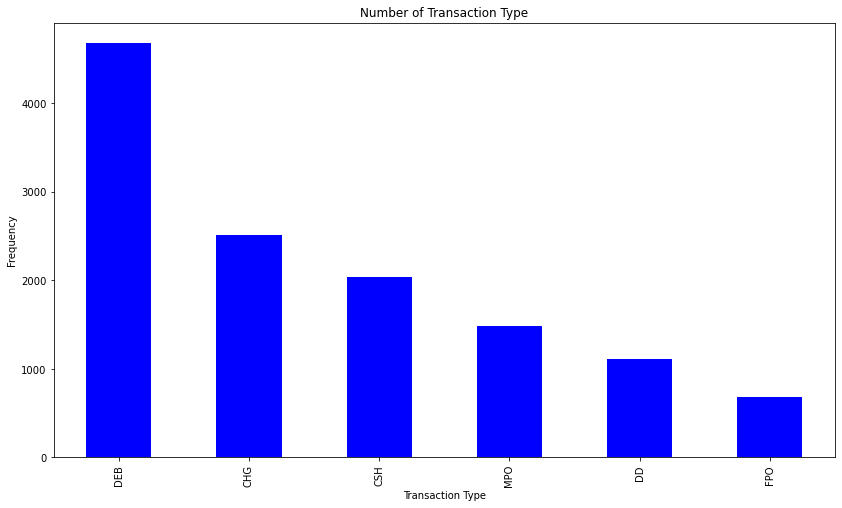

In [177]:
#Number of transaction types by category
ax = final_df['bank_transaction_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Transaction Type", color ='blue')
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Frequency")
plt.show()

In [169]:
#transactions by transaction type
final_df.groupby(['bank_transaction_category'])['bank_transaction_type'].value_counts()

bank_transaction_category  bank_transaction_type
ACCOMMODATION_AND_MEALS    DEB                      1941
                           CSH                      1112
                           FPO                       398
                           MPO                       314
BANK_OR_FINANCE_CHARGES    CHG                      2510
                           FPO                       149
                           MPO                       131
INSURANCE                  DD                        940
                           MPO                       119
                           FPO                       111
MOTOR_EXPENSES             DEB                       865
                           MPO                       298
                           CSH                       261
                           DD                        168
                           FPO                        17
TRAVEL                     DEB                      1872
                           CSH         

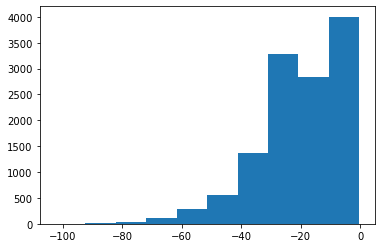

In [170]:
#Number of transactions by Amount
plt.hist(final_df['bank_transaction_amount'], bins = 10)
plt.show()

In [171]:
#Descriptive statistics for bank transaction amount
final_df['bank_transaction_amount'].describe()

count    12500.000000
mean       -19.613017
std         15.060147
min       -102.590000
25%        -28.022500
50%        -19.040000
75%         -4.687500
max         -0.320000
Name: bank_transaction_amount, dtype: float64

Its a left skewed data. With minimum value of -102 and max of -0.21pence. 

In [173]:
#Number of transactions by transaction description
final_df['bank_transaction_description'].value_counts()

Fee                                                  63
Bank Charges                                         57
paypal                                               53
PAYPAL                                               48
AMZNMKTPLACE                                         34
                                                     ..
Sundry debit: indigo                                  1
Sundry debit: Cash at Transact PREMIER INN 6Aug19     1
Fin: Apple Pay  fuel service station                  1
SUNDRY DEBIT  AIRBNB 30Jul19                          1
just eat 30Jul19 CONTACTLESS                          1
Name: bank_transaction_description, Length: 9473, dtype: int64

There are as many as 9473 unique descriptions out of 12500. 

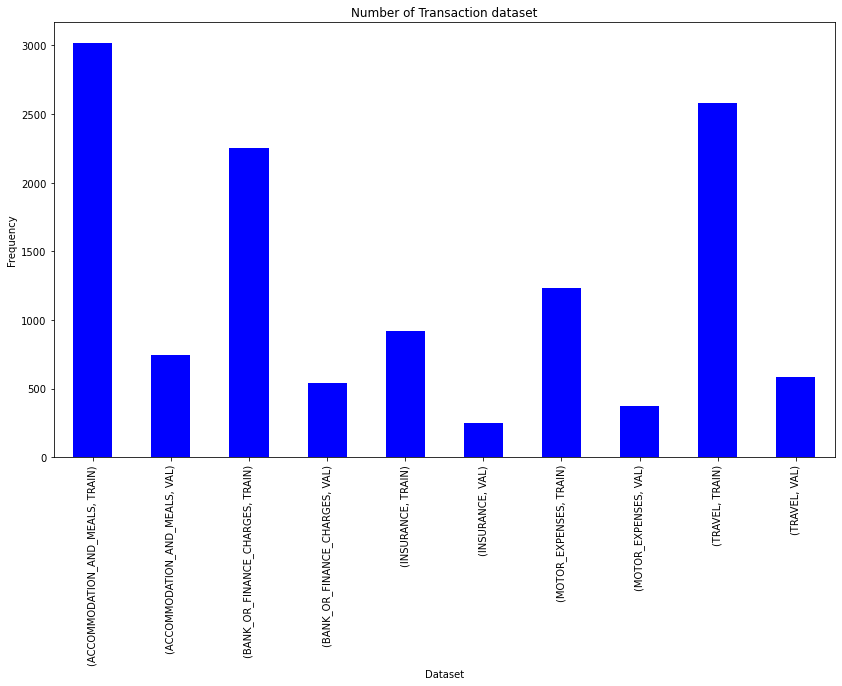

In [174]:
#Number of transaction types by dataset
ax = final_df.groupby(['bank_transaction_category'])['bank_transaction_dataset'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Transaction dataset", color ='blue')
ax.set_xlabel("Dataset")
ax.set_ylabel("Frequency")
plt.show()

In [175]:
#Rows in train and validation dataset
final_df['bank_transaction_dataset'].value_counts()

TRAIN    10000
VAL       2500
Name: bank_transaction_dataset, dtype: int64

There are 10000 rows in train dataset and 2500 rows in validation set.


From the above graph and table below we can infer,

all categories are distributed propotionately in both train and validation. This helps us get rid of imbalance classification issue.

In [166]:
#Number of transactions by Train and Validation
final_df.groupby(['bank_transaction_category'])['bank_transaction_dataset'].value_counts()

bank_transaction_category  bank_transaction_dataset
ACCOMMODATION_AND_MEALS    TRAIN                       3017
                           VAL                          748
BANK_OR_FINANCE_CHARGES    TRAIN                       2250
                           VAL                          540
INSURANCE                  TRAIN                        920
                           VAL                          250
MOTOR_EXPENSES             TRAIN                       1235
                           VAL                          374
TRAVEL                     TRAIN                       2578
                           VAL                          588
Name: bank_transaction_dataset, dtype: int64

# Train, and Test split

In [178]:
#Converting the bank_transaction_category to numerical categorical variable
final_df['bank_transaction_category_id'] = pd.factorize(final_df['bank_transaction_category'])[0] + 1

#subset validation set from final_df
X_test = final_df.loc[final_df['bank_transaction_dataset'] == 'VAL','bank_transaction_description']
y_test = final_df.loc[final_df['bank_transaction_dataset'] == 'VAL','bank_transaction_category_id']

#dimensions of validation sets
print(X_test.shape)
print(y_test.shape)

#subset train set from final_df
X_train = final_df.loc[final_df['bank_transaction_dataset'] == 'TRAIN','bank_transaction_description']
y_train = final_df.loc[final_df['bank_transaction_dataset'] == 'TRAIN','bank_transaction_category_id']

#dimensions of train sets
print(X_train.shape)
print(y_train.shape)

(2500,)
(2500,)
(10000,)
(10000,)


# Text Preprocessing

In [179]:
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#instantiate the TfidfVectorizer class
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

#fit and transforming the description column into a array of numbers
features_train = tfidf.fit_transform(X_train.astype('U'))

#assigning target variable
labels_train = y_train

#shape of transformed X_train
features_train.shape

(10000, 1109)

In [180]:
#transforming the description column into a array of numbers
features_test = tfidf.transform(X_test.astype('U'))

#shape of transformed X_test
labels_test = y_test

# Modeling

In [187]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#importing metrics for evaluation
from sklearn.metrics import accuracy_score,classification_report

#instantiate RandomForestClassifier class
model  = RandomForestClassifier(random_state=123)

#train the model
model.fit(features_train, labels_train)

#making prediction with the test set
model_predictions = model.predict(features_test)

#printing the accuracy
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

#displaying the classification report
print(classification_report(labels_test, model_predictions))

Accuracy:  0.91
              precision    recall  f1-score   support

           1       0.88      0.87      0.87       588
           2       0.88      0.79      0.83       374
           3       0.92      0.94      0.93       748
           4       0.96      0.97      0.97       540
           5       0.87      0.96      0.91       250

    accuracy                           0.91      2500
   macro avg       0.90      0.91      0.90      2500
weighted avg       0.91      0.91      0.91      2500



Overall Acuracy: 91%

*Precision* for class  c  is the number of true positives for class  c  as a proportion of the total number of positive predictions for class  c.

Precision for various classes: 

1. Travel : 88%
2. MOTOR_EXPENSES : 88%
3. ACCOMMODATION_AND_MEALS : 92%
4. BANK_OR_FINANCE_CHARGES : 96%
5. INSURANCE : 87%

Recall for class  c  is the number of true positives for class  c  as a proportion of the total number of actual positives for class  c

Recall for various classes: 

1. Travel : 87%
2. MOTOR_EXPENSES : 79%
3. ACCOMMODATION_AND_MEALS : 94%
4. BANK_OR_FINANCE_CHARGES : 97%
5. INSURANCE : 96%


In [189]:
#Importing confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix

#create the confusion matrix
cm = confusion_matrix(labels_test, model_predictions)

cm

array([[512,  28,  34,  14,   0],
       [ 31, 295,  18,   1,  29],
       [ 36,   4, 703,   3,   2],
       [  4,   0,   6, 526,   4],
       [  0,   7,   2,   2, 239]], dtype=int64)

The diagonal elements(512,295,703,526,239) are the correctly classified rows. All other rows were classified incorrectly

In [191]:
#mapping category_id and category
final_df[['bank_transaction_category_id','bank_transaction_category']].drop_duplicates()

,bank_transaction_category_id,bank_transaction_category
0,1,TRAVEL
2510,2,MOTOR_EXPENSES
3660,3,ACCOMMODATION_AND_MEALS
6830,4,BANK_OR_FINANCE_CHARGES
9080,5,INSURANCE


# Further Improvements

1. Hyperparameter Tuning 
Tuning the model may give us better results and we may be able to generalize the model even more. 

2. Training with other modeling techniques.

3. Using Cross Validation

4. Adding more training data.

5. The problem given was a balanced data while, in real scenario to get a balanced dataset is rare. Handling imbalanced data with sampling techniques.

6. Use a powerful text preprocessor.